In [2]:
import warnings
warnings.filterwarnings(action='ignore') 

In [3]:
import pandas as pd
import numpy as np

# 데이터 가져오기

In [ ]:
- 지하철 승하차 역별 시간별 : https://data.seoul.go.kr/dataList/OA-12252/S/1/datasetView.do
-        

# 지하철 승하차인원 전처리

In [5]:
sw=pd.read_csv('서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv',encoding='cp949')

In [32]:
sw

,사용월,호선명,지하철역,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,10시-11시 승차인원,...,17시-18시 승차인원,17시-18시 하차인원,18시-19시 승차인원,18시-19시 하차인원,19시-20시 승차인원,19시-20시 하차인원,20시-21시 승차인원,20시-21시 하차인원,21시-22시 승차인원,21시-22시 하차인원
0,202111,1호선,동대문,14133,10756,19586,22687,16773,22168,15451,...,25478,17790,22606,18178,14952,18367,12261,12552,11322,10218
1,202111,1호선,동묘앞,5711,7976,9492,20213,7707,16905,8586,...,29570,11763,17697,8988,7597,6173,4948,4434,4545,4032
2,202111,1호선,서울역,36492,93181,61857,196998,48518,131911,49785,...,136669,75650,198548,82448,93839,51787,65417,34209,70807,29311
3,202111,1호선,시청,6504,57521,8275,173717,8576,83121,9894,...,75744,20612,142785,20226,51305,9055,42181,5305,40637,4545
4,202111,1호선,신설동,16712,22696,24617,62491,17378,33687,15449,...,41297,21270,55999,26042,20452,17205,13553,11351,11922,10451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48372,201501,중앙선,운길산,1292,675,1479,1390,1438,3270,1408,...,3571,1300,2304,1218,1332,1457,1002,769,942,760
48373,201501,중앙선,원덕,537,248,823,344,980,273,1025,...,481,735,563,721,175,714,156,612,53,404
48374,201501,중앙선,중랑,22160,3027,25792,6573,14328,6133,11117,...,8279,13786,8399,19547,6449,21424,4652,14362,3849,11678
48375,201501,중앙선,팔당,1227,523,910,1151,897,2931,1009,...,2260,979,1617,822,845,749,492,320,420,319


- 3년치 데이터를 평균화하고싶기떄문에 필요없는 기간 드랍하기

In [33]:
sw.loc[(sw['사용월']==201901)]
sw=sw.drop(sw.index[21045:])

- 무식하게 이용시간 평균구하기

In [34]:
sw['07-10 on avg']=(sw['07시-08시 승차인원']+sw['08시-09시 승차인원']+sw['09시-10시 승차인원'])/3
sw['07-10 off avg']=(sw['07시-08시 하차인원']+sw['08시-09시 하차인원']+sw['09시-10시 하차인원'])/3
sw['10-17 on avg']=(sw['10시-11시 승차인원']+sw['11시-12시 승차인원']+sw['12시-13시 승차인원']+sw['13시-14시 승차인원']+sw['14시-15시 승차인원']+sw['15시-16시 승차인원']+sw['16시-17시 승차인원'])/7
sw['10-17 off avg']=(sw['10시-11시 하차인원']+sw['11시-12시 하차인원']+sw['12시-13시 하차인원']+sw['13시-14시 하차인원']+sw['14시-15시 하차인원']+sw['15시-16시 하차인원']+sw['16시-17시 하차인원'])/7
sw['17-22 on avg']=(sw['17시-18시 승차인원']+sw['18시-19시 승차인원']+sw['19시-20시 승차인원']+sw['20시-21시 승차인원']+sw['21시-22시 승차인원'])/5
sw['17-22 off avg']=(sw['17시-18시 하차인원']+sw['18시-19시 하차인원']+sw['19시-20시 하차인원']+sw['20시-21시 하차인원']+sw['21시-22시 하차인원'])/5

- 필요없는 컬럼들 삭제하기

In [35]:
sw=sw.drop(sw.columns[3:33],axis=1)

In [36]:
sw=sw.drop(['사용월','호선명'],axis=1)

In [37]:
sw

,지하철역,07-10 on avg,07-10 off avg,10-17 on avg,10-17 off avg,17-22 on avg,17-22 off avg
0,동대문,16830.666667,18537.000000,21517.428571,20748.857143,17323.8,15421.0
1,동묘앞,7636.666667,15031.333333,22757.714286,24511.714286,12871.4,7078.0
2,서울역,48955.666667,140696.666667,67027.000000,62402.142857,113056.0,54681.0
3,시청,7785.000000,104786.333333,24773.000000,27947.000000,70530.4,11948.6
4,신설동,19569.000000,39624.666667,21350.571429,18542.142857,28644.6,17263.8
...,...,...,...,...,...,...,...
21040,원덕,1123.000000,322.333333,797.142857,621.714286,267.6,849.4
21041,중랑,20478.666667,5177.333333,9181.285714,7563.714286,5934.8,15483.0
21042,지평,110.333333,63.666667,97.428571,89.714286,20.6,45.2
21043,팔당,1200.000000,1943.333333,1504.285714,1798.000000,1883.0,1065.4


- groupby를 통해서 지하철역 기준으로 데이터를 병합

In [38]:
sw1=sw.groupby(['지하철역'],as_index=False).mean()
sw1

,지하철역,07-10 on avg,07-10 off avg,10-17 on avg,10-17 off avg,17-22 on avg,17-22 off avg
0,4.19민주묘지,7070.780952,4007.228571,5191.126531,4449.146939,3565.742857,5457.354286
1,가능,19677.838095,9021.561905,9545.183673,7692.632653,7008.405714,14585.537143
2,가락시장,14913.314286,20191.714286,12542.181633,11831.569388,15680.737143,15024.620000
3,가산디지털단지,16328.771429,159990.780952,24042.971429,26365.214286,100601.908571,20738.020000
4,가양,60359.371429,28602.600000,27315.367347,21860.220408,24845.137143,45483.857143
...,...,...,...,...,...,...,...
521,회기,55331.238095,38492.971429,39953.934694,32827.677551,38368.662857,50878.582857
522,회룡,42742.961905,10009.666667,18051.734694,15949.604082,9222.902857,31395.222857
523,회현(남대문시장),8180.361905,94383.085714,43479.836735,50474.730612,67686.137143,12694.445714
524,효창공원앞,11115.271429,11623.052381,6371.055102,5605.426531,8870.237143,8140.717143


- 불필요한 실수형을 정수형으로 변환

In [39]:
sw1=sw1.astype({'07-10 on avg':'int',
              '07-10 off avg':'int',
              '10-17 on avg':'int',
              '10-17 off avg':'int',
              '17-22 on avg':'int',
              '17-22 off avg':'int',})

- 칼럼 영문변환

In [40]:
sw1.rename(columns = {'지하철역':'station'}, inplace = True)
sw1

,station,07-10 on avg,07-10 off avg,10-17 on avg,10-17 off avg,17-22 on avg,17-22 off avg
0,4.19민주묘지,7070,4007,5191,4449,3565,5457
1,가능,19677,9021,9545,7692,7008,14585
2,가락시장,14913,20191,12542,11831,15680,15024
3,가산디지털단지,16328,159990,24042,26365,100601,20738
4,가양,60359,28602,27315,21860,24845,45483
...,...,...,...,...,...,...,...
521,회기,55331,38492,39953,32827,38368,50878
522,회룡,42742,10009,18051,15949,9222,31395
523,회현(남대문시장),8180,94383,43479,50474,67686,12694
524,효창공원앞,11115,11623,6371,5605,8870,8140


In [41]:
sw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   station        526 non-null    object
 1   07-10 on avg   526 non-null    int32 
 2   07-10 off avg  526 non-null    int32 
 3   10-17 on avg   526 non-null    int32 
 4   10-17 off avg  526 non-null    int32 
 5   17-22 on avg   526 non-null    int32 
 6   17-22 off avg  526 non-null    int32 
dtypes: int32(6), object(1)
memory usage: 16.6+ KB


# 지하철 좌표 전처리

In [46]:
sl=pd.read_csv('지하철 좌표.csv')

In [47]:
sl

,지하철역,X,Y,호선명
0,가능,37.748577,127.044213,1호선
1,가락시장,37.492522,127.118234,1호선
2,가락시장,37.492522,127.118234,1호선
3,가산디지털단지,37.481072,126.882343,1호선
4,가산디지털단지,37.481072,126.882343,1호선
...,...,...,...,...
590,회룡,37.724846,127.046895,중앙선
591,회현(남대문시장),37.558514,126.978246,중앙선
592,효창공원앞,37.539261,126.961351,중앙선
593,효창공원앞,37.539261,126.961351,중앙선


In [48]:
sl.지하철역.value_counts()

김포공항           4
공덕             4
서울역            4
고속터미널          3
종로3가           3
              ..
반월             1
미아사거리          1
미아(서울사이버대학)    1
미사             1
흑석(중앙대입구)      1
Name: 지하철역, Length: 509, dtype: int64

- 중복된값을 제거해서 하나로 통일

In [55]:
sl1=sl.drop_duplicates(['지하철역'])
sl1

,지하철역,X,Y,호선명
0,가능,37.748577,127.044213,1호선
1,가락시장,37.492522,127.118234,1호선
3,가산디지털단지,37.481072,126.882343,1호선
5,가양,37.561391,126.854456,1호선
6,가오리,37.641701,127.016792,1호선
...,...,...,...,...
589,회기,37.589460,127.057583,중앙선
590,회룡,37.724846,127.046895,중앙선
591,회현(남대문시장),37.558514,126.978246,중앙선
592,효창공원앞,37.539261,126.961351,중앙선


- 인덱스값 순서에맞게 정렬후 marge하기전에  컬럼값동일하게 만들기

In [56]:
sl1.rename(columns = {'지하철역':'station','호선명':'line'}, inplace = True)
sl1.reset_index(drop= False,inplace=True)
sl1=sl1.drop(['index'],axis=1)
sl1

C:\Users\KI\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,station,X,Y,line
0,가능,37.748577,127.044213,1호선
1,가락시장,37.492522,127.118234,1호선
2,가산디지털단지,37.481072,126.882343,1호선
3,가양,37.561391,126.854456,1호선
4,가오리,37.641701,127.016792,1호선
...,...,...,...,...
504,회기,37.589460,127.057583,중앙선
505,회룡,37.724846,127.046895,중앙선
506,회현(남대문시장),37.558514,126.978246,중앙선
507,효창공원앞,37.539261,126.961351,중앙선


# 데이터 합치기

In [57]:
merge_df=pd.merge(sw1,sl1,how='outer', on='station')

In [58]:
merge_df

,station,07-10 on avg,07-10 off avg,10-17 on avg,10-17 off avg,17-22 on avg,17-22 off avg,X,Y,line
0,4.19민주묘지,7070,4007,5191,4449,3565,5457,NaN,NaN,NaN
1,가능,19677,9021,9545,7692,7008,14585,37.748577,127.044213,1호선
2,가락시장,14913,20191,12542,11831,15680,15024,37.492522,127.118234,1호선
3,가산디지털단지,16328,159990,24042,26365,100601,20738,37.481072,126.882343,1호선
4,가양,60359,28602,27315,21860,24845,45483,37.561391,126.854456,1호선
...,...,...,...,...,...,...,...,...,...,...
521,회기,55331,38492,39953,32827,38368,50878,37.589460,127.057583,중앙선
522,회룡,42742,10009,18051,15949,9222,31395,37.724846,127.046895,중앙선
523,회현(남대문시장),8180,94383,43479,50474,67686,12694,37.558514,126.978246,중앙선
524,효창공원앞,11115,11623,6371,5605,8870,8140,37.539261,126.961351,중앙선


In [18]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21045 entries, 0 to 21044
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   term           21045 non-null  int64  
 1   line           21045 non-null  object 
 2   name           21045 non-null  object 
 3   07-10 on avg   21045 non-null  int32  
 4   07-10 off avg  21045 non-null  int32  
 5   10-17 on avg   21045 non-null  int32  
 6   10-17 off avg  21045 non-null  int32  
 7   17-22 on avg   21045 non-null  int32  
 8   17-22 off avg  21045 non-null  int32  
 9   X              20738 non-null  float64
 10  Y              20738 non-null  float64
dtypes: float64(2), int32(6), int64(1), object(2)
memory usage: 1.4+ MB


- 결측치 있는값들 삭제
- 결측치 제거해도되는 이유는 우리는 서울을 기준으로하기때문에
- 좌표데이터는 서울시 내에있는 지하철 역에 데이터만있음

In [59]:
merge_df.dropna(axis=0,inplace=True)
merge_df

,station,07-10 on avg,07-10 off avg,10-17 on avg,10-17 off avg,17-22 on avg,17-22 off avg,X,Y,line
1,가능,19677,9021,9545,7692,7008,14585,37.748577,127.044213,1호선
2,가락시장,14913,20191,12542,11831,15680,15024,37.492522,127.118234,1호선
3,가산디지털단지,16328,159990,24042,26365,100601,20738,37.481072,126.882343,1호선
4,가양,60359,28602,27315,21860,24845,45483,37.561391,126.854456,1호선
5,가오리,13832,3586,6063,5343,3245,9549,37.641701,127.016792,1호선
...,...,...,...,...,...,...,...,...,...,...
521,회기,55331,38492,39953,32827,38368,50878,37.589460,127.057583,중앙선
522,회룡,42742,10009,18051,15949,9222,31395,37.724846,127.046895,중앙선
523,회현(남대문시장),8180,94383,43479,50474,67686,12694,37.558514,126.978246,중앙선
524,효창공원앞,11115,11623,6371,5605,8870,8140,37.539261,126.961351,중앙선


In [60]:
merge_df.reset_index(drop= False,inplace=True)
merge_df

,index,station,07-10 on avg,07-10 off avg,10-17 on avg,10-17 off avg,17-22 on avg,17-22 off avg,X,Y,line
0,1,가능,19677,9021,9545,7692,7008,14585,37.748577,127.044213,1호선
1,2,가락시장,14913,20191,12542,11831,15680,15024,37.492522,127.118234,1호선
2,3,가산디지털단지,16328,159990,24042,26365,100601,20738,37.481072,126.882343,1호선
3,4,가양,60359,28602,27315,21860,24845,45483,37.561391,126.854456,1호선
4,5,가오리,13832,3586,6063,5343,3245,9549,37.641701,127.016792,1호선
...,...,...,...,...,...,...,...,...,...,...,...
504,521,회기,55331,38492,39953,32827,38368,50878,37.589460,127.057583,중앙선
505,522,회룡,42742,10009,18051,15949,9222,31395,37.724846,127.046895,중앙선
506,523,회현(남대문시장),8180,94383,43479,50474,67686,12694,37.558514,126.978246,중앙선
507,524,효창공원앞,11115,11623,6371,5605,8870,8140,37.539261,126.961351,중앙선


In [61]:
merge_df=merge_df.drop('index',axis=1)
merge_df

,station,07-10 on avg,07-10 off avg,10-17 on avg,10-17 off avg,17-22 on avg,17-22 off avg,X,Y,line
0,가능,19677,9021,9545,7692,7008,14585,37.748577,127.044213,1호선
1,가락시장,14913,20191,12542,11831,15680,15024,37.492522,127.118234,1호선
2,가산디지털단지,16328,159990,24042,26365,100601,20738,37.481072,126.882343,1호선
3,가양,60359,28602,27315,21860,24845,45483,37.561391,126.854456,1호선
4,가오리,13832,3586,6063,5343,3245,9549,37.641701,127.016792,1호선
...,...,...,...,...,...,...,...,...,...,...
504,회기,55331,38492,39953,32827,38368,50878,37.589460,127.057583,중앙선
505,회룡,42742,10009,18051,15949,9222,31395,37.724846,127.046895,중앙선
506,회현(남대문시장),8180,94383,43479,50474,67686,12694,37.558514,126.978246,중앙선
507,효창공원앞,11115,11623,6371,5605,8870,8140,37.539261,126.961351,중앙선


In [62]:
merge_df = merge_df[[ 'station', 'line', '07-10 on avg','07-10 off avg','10-17 on avg','10-17 off avg','17-22 on avg','17-22 off avg','X','Y']]
merge_df

,station,line,07-10 on avg,07-10 off avg,10-17 on avg,10-17 off avg,17-22 on avg,17-22 off avg,X,Y
0,가능,1호선,19677,9021,9545,7692,7008,14585,37.748577,127.044213
1,가락시장,1호선,14913,20191,12542,11831,15680,15024,37.492522,127.118234
2,가산디지털단지,1호선,16328,159990,24042,26365,100601,20738,37.481072,126.882343
3,가양,1호선,60359,28602,27315,21860,24845,45483,37.561391,126.854456
4,가오리,1호선,13832,3586,6063,5343,3245,9549,37.641701,127.016792
...,...,...,...,...,...,...,...,...,...,...
504,회기,중앙선,55331,38492,39953,32827,38368,50878,37.589460,127.057583
505,회룡,중앙선,42742,10009,18051,15949,9222,31395,37.724846,127.046895
506,회현(남대문시장),중앙선,8180,94383,43479,50474,67686,12694,37.558514,126.978246
507,효창공원앞,중앙선,11115,11623,6371,5605,8870,8140,37.539261,126.961351


In [63]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   station        509 non-null    object 
 1   line           509 non-null    object 
 2   07-10 on avg   509 non-null    int32  
 3   07-10 off avg  509 non-null    int32  
 4   10-17 on avg   509 non-null    int32  
 5   10-17 off avg  509 non-null    int32  
 6   17-22 on avg   509 non-null    int32  
 7   17-22 off avg  509 non-null    int32  
 8   X              509 non-null    float64
 9   Y              509 non-null    float64
dtypes: float64(2), int32(6), object(2)
memory usage: 28.0+ KB


# 합친 데이터 저장

In [64]:
merge_df.to_csv('지하철 승하차인원 평균 월,시간,좌표.csv',encoding='cp949')

# 분류하기

In [3]:
sw=pd.read_csv('지하철 승하차인원 평균 월,시간,좌표.csv',encoding='cp949')

In [68]:
sw

,Unnamed: 0,station,line,07-10 on avg,07-10 off avg,10-17 on avg,10-17 off avg,17-22 on avg,17-22 off avg,X,Y
0,0,가능,1호선,19677,9021,9545,7692,7008,14585,37.748577,127.044213
1,1,가락시장,1호선,14913,20191,12542,11831,15680,15024,37.492522,127.118234
2,2,가산디지털단지,1호선,16328,159990,24042,26365,100601,20738,37.481072,126.882343
3,3,가양,1호선,60359,28602,27315,21860,24845,45483,37.561391,126.854456
4,4,가오리,1호선,13832,3586,6063,5343,3245,9549,37.641701,127.016792
...,...,...,...,...,...,...,...,...,...,...,...
504,504,회기,중앙선,55331,38492,39953,32827,38368,50878,37.589460,127.057583
505,505,회룡,중앙선,42742,10009,18051,15949,9222,31395,37.724846,127.046895
506,506,회현(남대문시장),중앙선,8180,94383,43479,50474,67686,12694,37.558514,126.978246
507,507,효창공원앞,중앙선,11115,11623,6371,5605,8870,8140,37.539261,126.961351


In [69]:
sw.describe()

,Unnamed: 0,07-10 on avg,07-10 off avg,10-17 on avg,10-17 off avg,17-22 on avg,17-22 off avg,X,Y
count,509.00000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,254.00000,24448.974460,22582.444008,14785.237721,14169.571709,19508.009823,21035.646365,37.513919,126.997396
std,147.07991,23514.637774,31503.855632,12723.217884,13905.023638,24721.126609,19601.696989,0.160419,0.183110
min,0.00000,5.000000,41.000000,59.000000,71.000000,48.000000,15.000000,36.769502,126.439320
25%,127.00000,8793.000000,5828.000000,6096.000000,5162.000000,5511.000000,8309.000000,37.482362,126.900984
50%,254.00000,18611.000000,12386.000000,11685.000000,9965.000000,11133.000000,15312.000000,37.527381,127.011220
75%,381.00000,32773.000000,24923.000000,19502.000000,18693.000000,23692.000000,27525.000000,37.582299,127.077725
max,508.00000,230945.000000,263928.000000,108271.000000,128623.000000,236847.000000,176327.000000,37.948100,127.723792


In [4]:
import seaborn as sns

<AxesSubplot:xlabel='station', ylabel='07-10 on avg'>

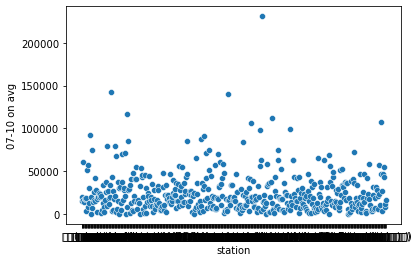

In [6]:
sns.scatterplot(x=sw['station'],y=sw['07-10 on avg'])

<AxesSubplot:xlabel='station', ylabel='07-10 off avg'>

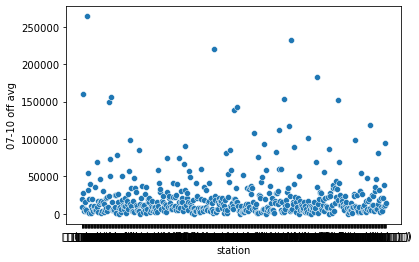

In [7]:
sns.scatterplot(x=sw['station'],y=sw['07-10 off avg'])

<AxesSubplot:xlabel='station', ylabel='10-17 on avg'>

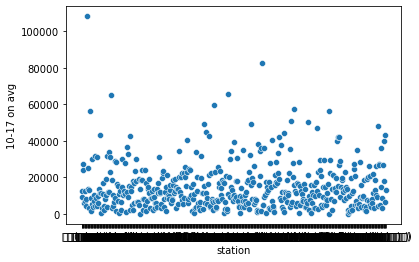

In [9]:
sns.scatterplot(x=sw['station'],y=sw['10-17 on avg'])

<AxesSubplot:xlabel='station', ylabel='10-17 off avg'>

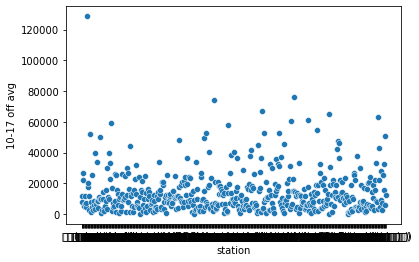

In [10]:
sns.scatterplot(x=sw['station'],y=sw['10-17 off avg'])

<AxesSubplot:xlabel='station', ylabel='17-22 on avg'>

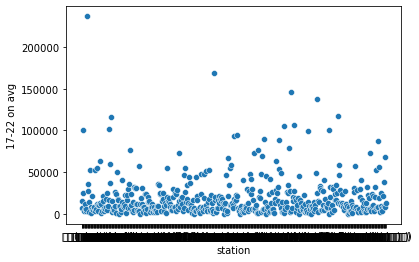

In [11]:
sns.scatterplot(x=sw['station'],y=sw['17-22 on avg'])

<AxesSubplot:xlabel='station', ylabel='17-22 off avg'>

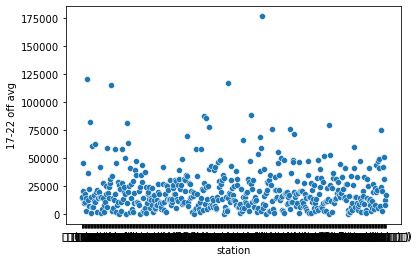

In [12]:
sns.scatterplot(x=sw['station'],y=sw['17-22 off avg'])

In [6]:
sw

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202111,1호선,동대문,782,14,12451,2166,8849,6242,14133,...,8790,47,1776,0,0,0,0,0,0,20211203
1,202111,1호선,동묘앞,141,1,2570,907,3387,4074,5711,...,2974,8,2017,0,2,0,0,0,0,20211203
2,202111,1호선,서울역,630,11,8985,7058,12028,40803,36492,...,12360,101,1257,1,3,2,2,0,0,20211203
3,202111,1호선,시청,30,0,2006,4859,2980,19785,6504,...,2196,65,309,0,0,0,0,0,0,20211203
4,202111,1호선,신설동,327,8,8031,2831,7820,10278,16712,...,7668,39,1222,0,0,0,0,0,0,20211203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48372,201501,중앙선,운길산,0,0,177,56,642,403,1292,...,633,3,222,0,0,0,0,0,0,20151223
48373,201501,중앙선,원덕,1,0,292,4,415,46,537,...,383,3,157,0,0,0,0,0,0,20151223
48374,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,...,6501,86,1617,0,0,0,0,0,0,20151223
48375,201501,중앙선,팔당,0,0,161,50,368,149,1227,...,336,8,85,0,0,0,0,0,0,20151223


In [12]:
sw1=sw.loc[:608]

In [16]:
sw2=sw1.지하철역.value_counts()

In [26]:
sw2.to_csv('확인용2.csv',encoding='cp949')

In [29]:
sw2=pd.read_csv('확인용1.csv',encoding='cp949')

In [30]:
sw2

,station,count
0,서울역,5
1,김포공항,4
2,공덕,4
3,고속터미널,3
4,종로3가,3
...,...,...
516,보라매,1
517,반포,1
518,면목,1
519,먹골,1


In [ ]:
sw.지하철역

In [24]:
sw3=pd.read_csv('지하철 승하차인원 평균 월,시간,좌표.csv',encoding='cp949')

In [31]:
merge_df1=pd.merge(sw3,sw2,how='inner', on='station')
merge_df1

,Unnamed: 0,station,line,07-10 on avg,07-10 off avg,10-17 on avg,10-17 off avg,17-22 on avg,17-22 off avg,X,Y,count
0,0,가능,1호선,19677,9021,9545,7692,7008,14585,37.748577,127.044213,1
1,1,가락시장,1호선,14913,20191,12542,11831,15680,15024,37.492522,127.118234,2
2,2,가산디지털단지,1호선,16328,159990,24042,26365,100601,20738,37.481072,126.882343,2
3,3,가양,1호선,60359,28602,27315,21860,24845,45483,37.561391,126.854456,1
4,4,가오리,1호선,13832,3586,6063,5343,3245,9549,37.641701,127.016792,1
...,...,...,...,...,...,...,...,...,...,...,...,...
504,504,회기,중앙선,55331,38492,39953,32827,38368,50878,37.589460,127.057583,1
505,505,회룡,중앙선,42742,10009,18051,15949,9222,31395,37.724846,127.046895,1
506,506,회현(남대문시장),중앙선,8180,94383,43479,50474,67686,12694,37.558514,126.978246,1
507,507,효창공원앞,중앙선,11115,11623,6371,5605,8870,8140,37.539261,126.961351,2
